In [1]:
import pandas as pd 
df = pd.read_csv('data/churn.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# EDA

In [2]:
# understanding data structure
df.shape



(440833, 12)

In [3]:
# features name 
df.columns



Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [4]:
# basic info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
# num vs cat cols 
df.dtypes.value_counts()

float64    9
object     3
Name: count, dtype: int64

In [6]:
# uniques values 
df.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

In [7]:
df = df.drop('CustomerID', axis=1)
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [8]:
# checking missing or null values 
df.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dropna(inplace=True)

In [11]:
df[df.isnull().any(axis=1)]


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [12]:
# basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,440832.0,39.373153,12.442369,18.0,29.0,39.0,48.0,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.0,32.0,46.0,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.0,16.0,23.0,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.0,3.0,6.0,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.0,12.0,19.0,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.0,661.0,830.0,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.0,14.0,22.0,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.0,1.0,1.0,1.0


In [13]:
# Target based EDA
df['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

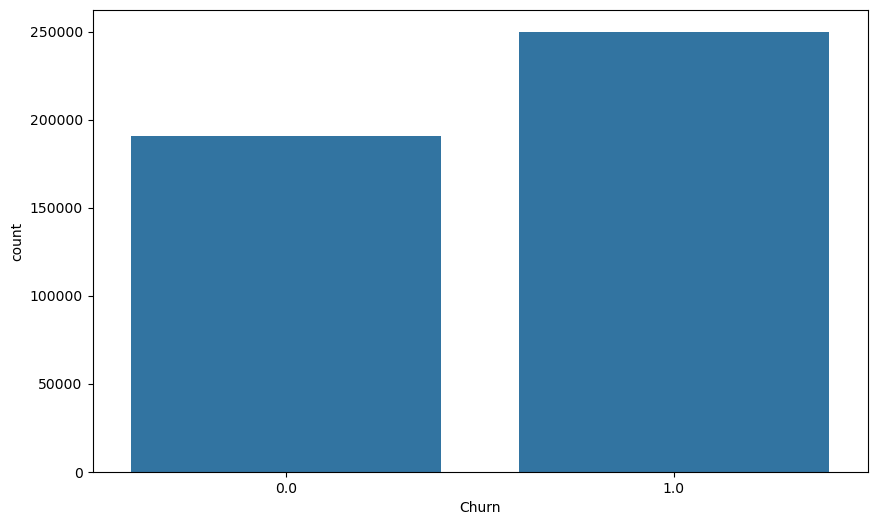

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.countplot(x= df['Churn'], data = df)
plt.show()

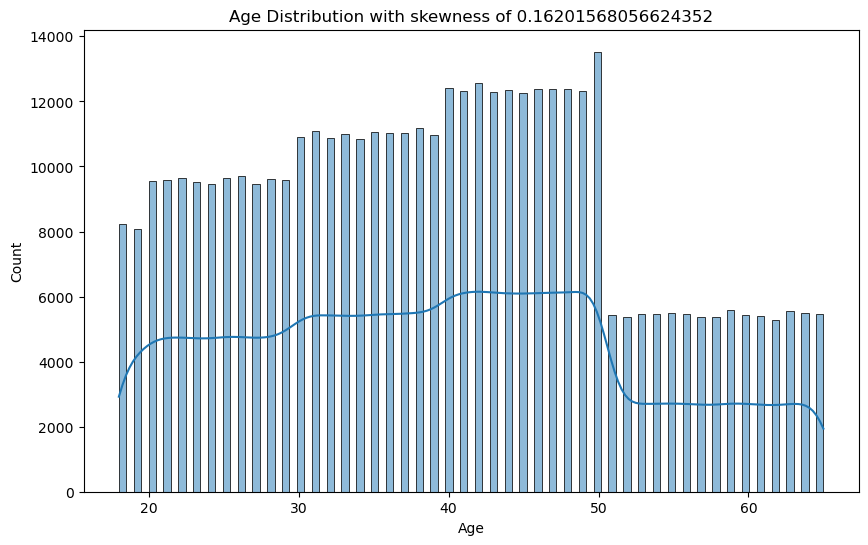

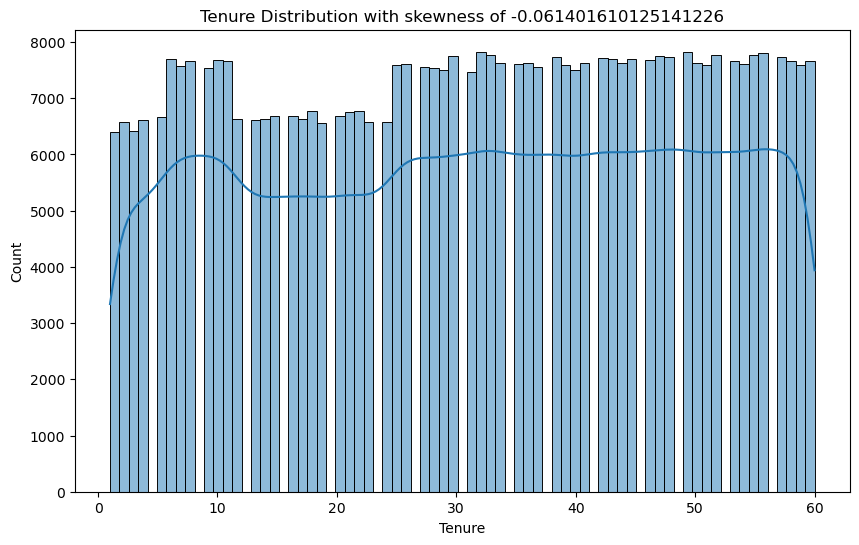

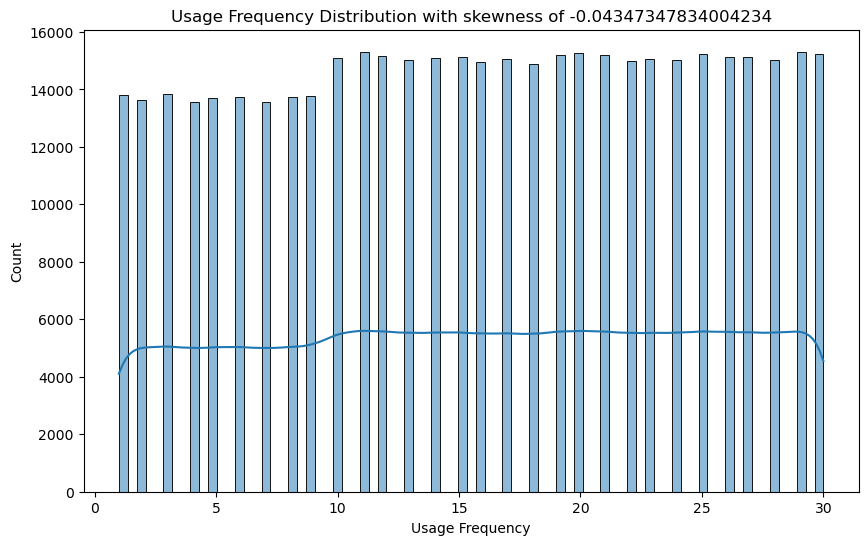

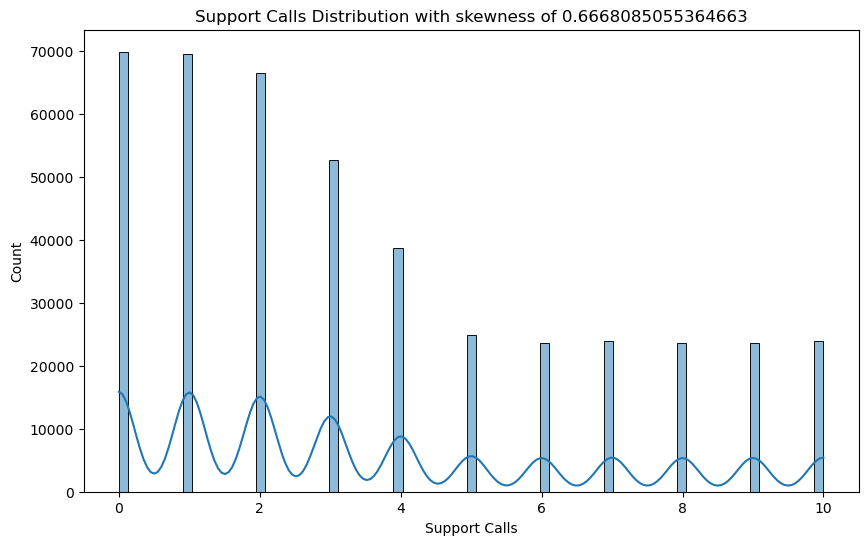

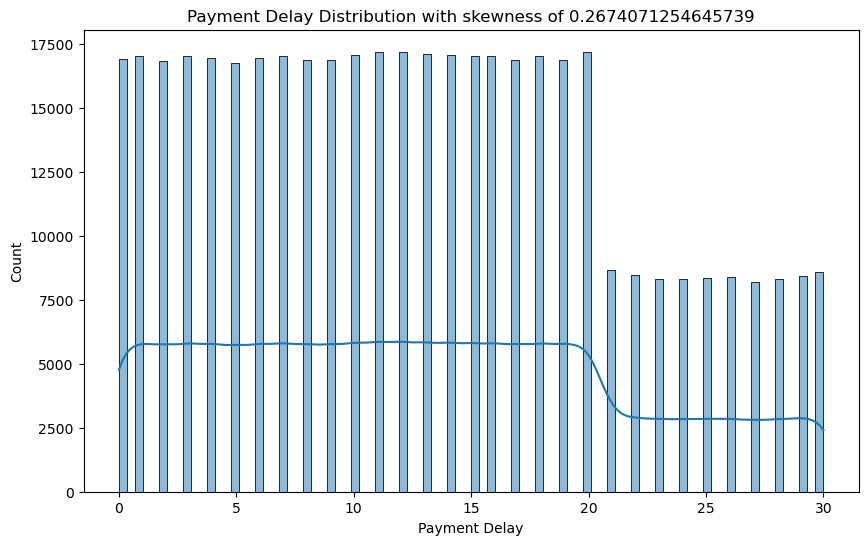

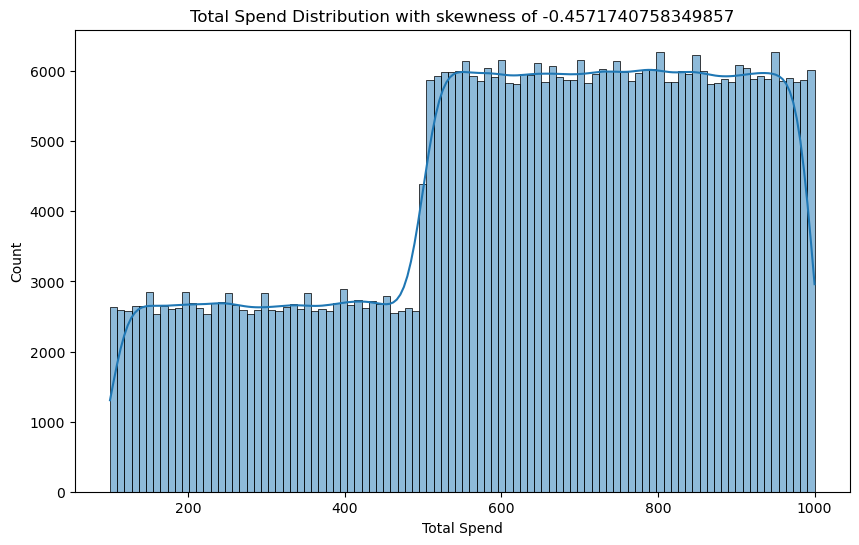

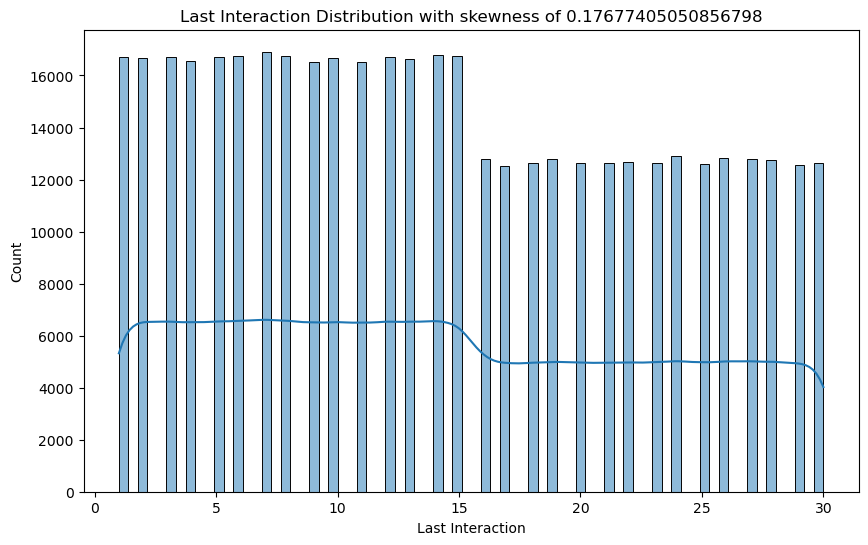

In [15]:
# visualize its distribution
num_col = df.select_dtypes(include ='number').columns
for col in num_col:
    if col!= 'Churn':
        plt.figure(figsize = (10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f"{col} Distribution with skewness of {df[col].skew()}")
        plt.show()
        

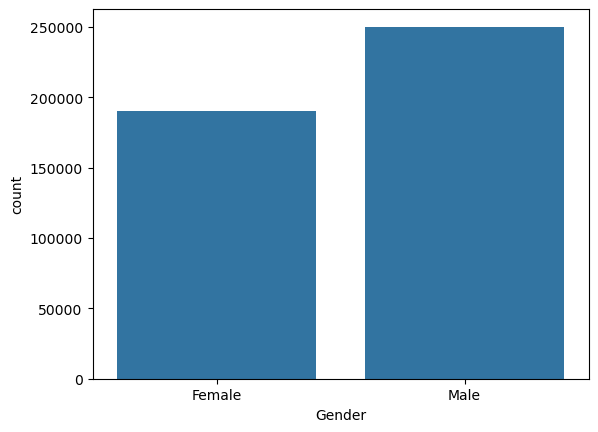

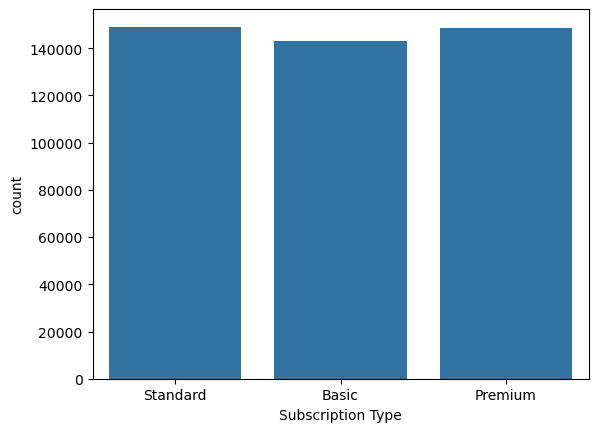

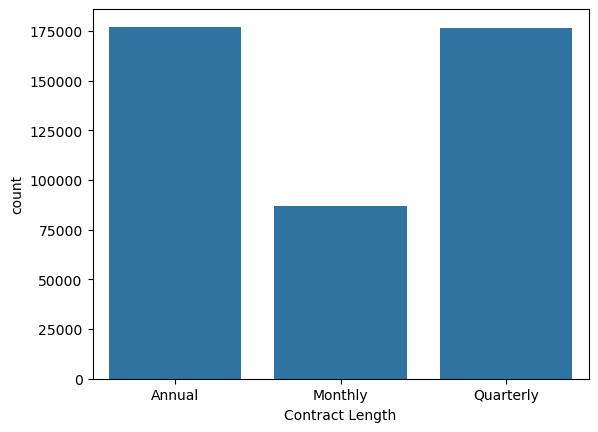

In [16]:
cat_cols = df.select_dtypes(include = 'object').columns
for col in cat_cols:
    if col != 'Churn':
        plt.Figure(figsize = (10, 6))
        sns.countplot(x=df[col], data = df)
        plt.show()

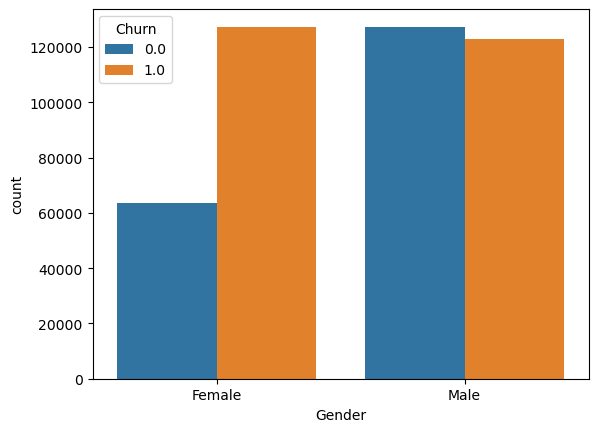

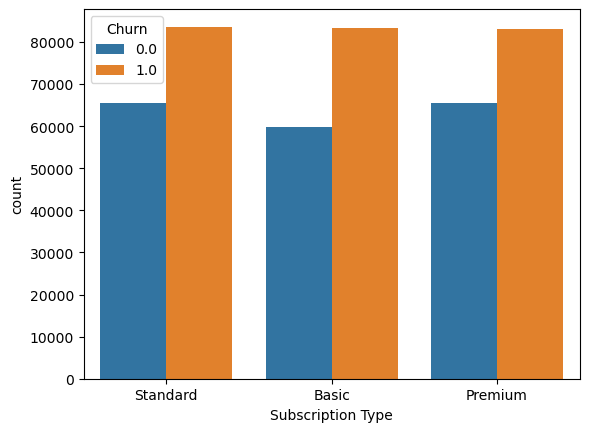

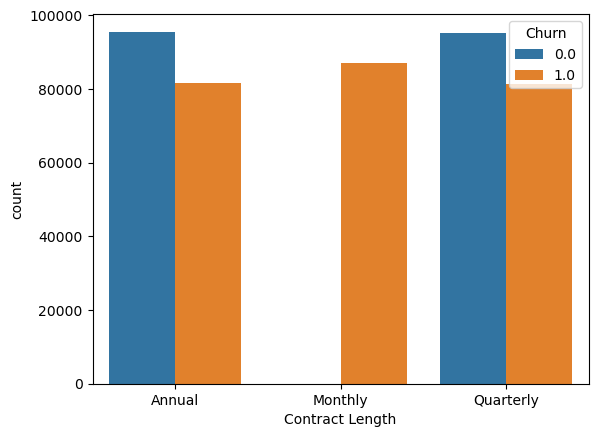

In [17]:
for col in cat_cols:
    if col != 'Churn':
        plt.Figure(figsize = (10, 6))
        sns.countplot(x=df[col], data = df, hue= 'Churn')
        plt.show()

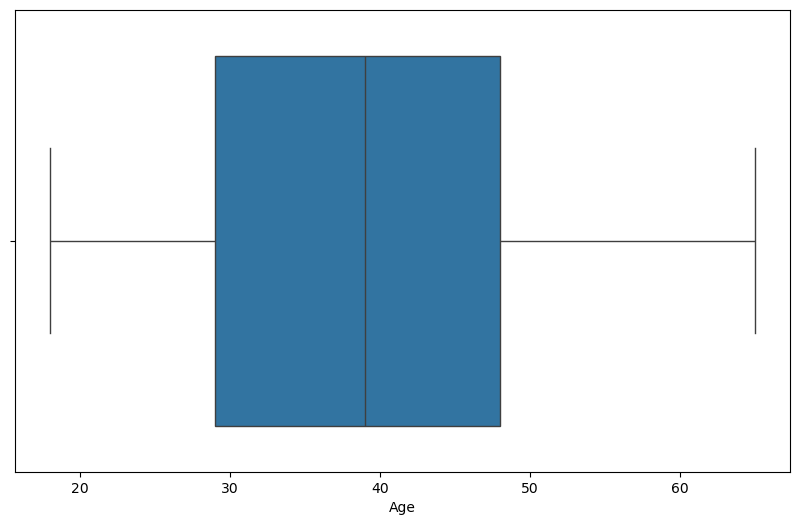

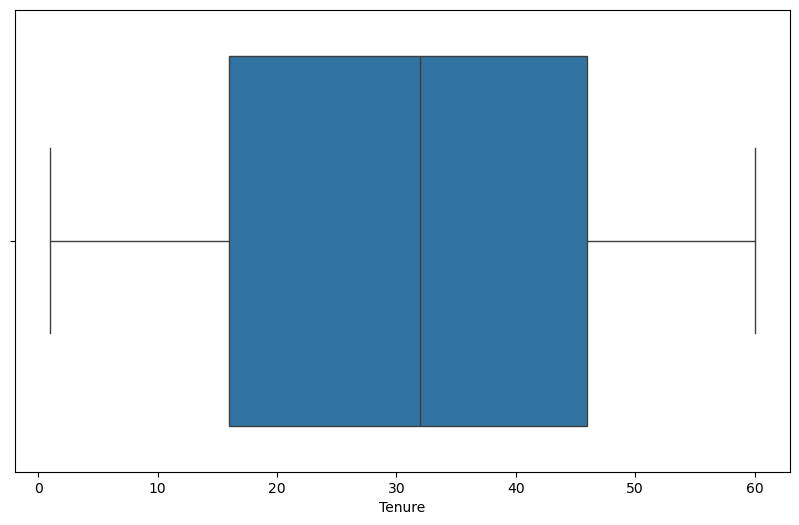

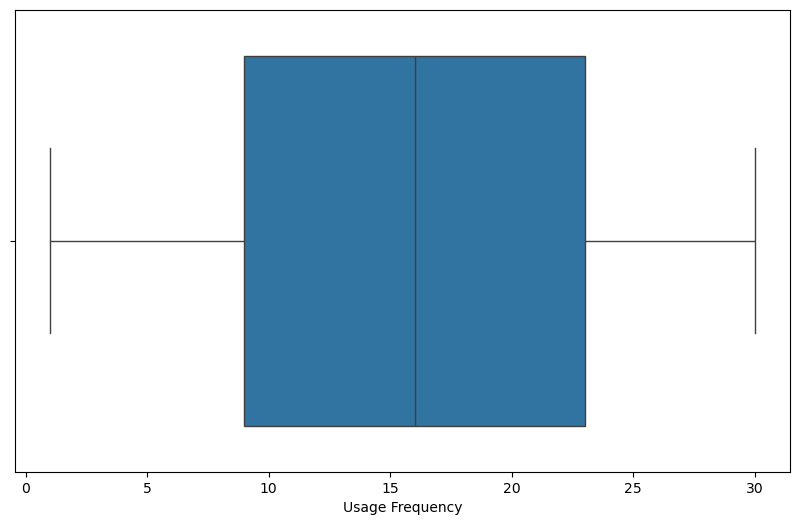

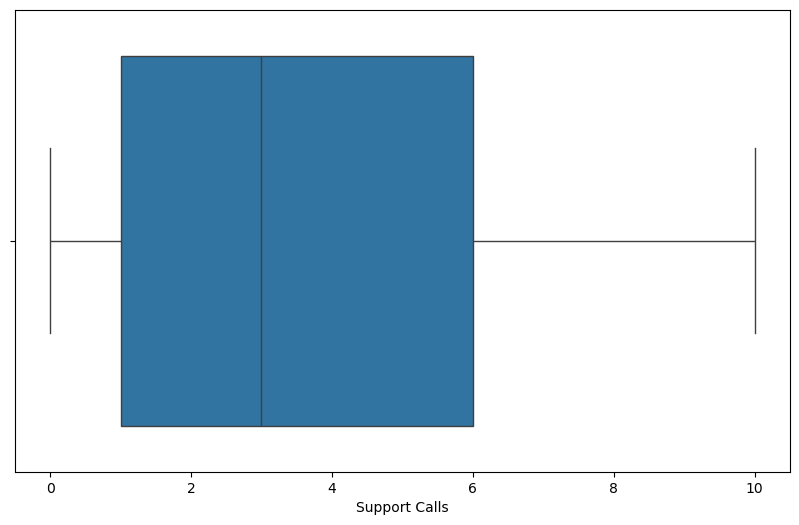

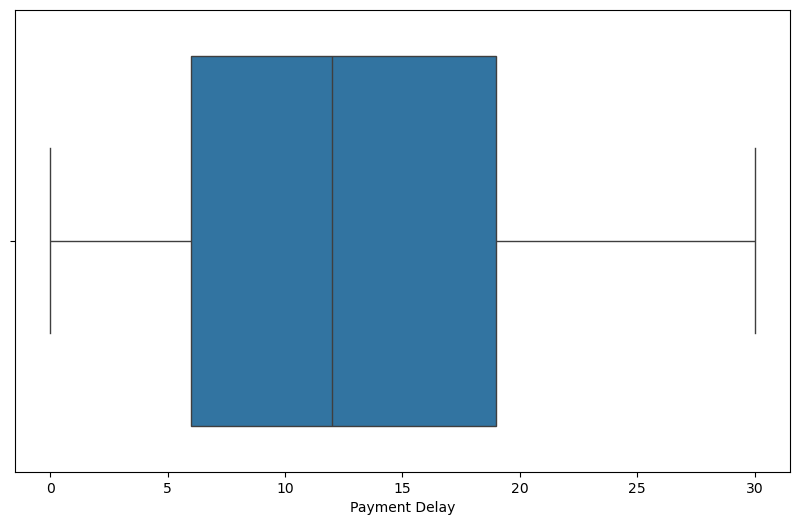

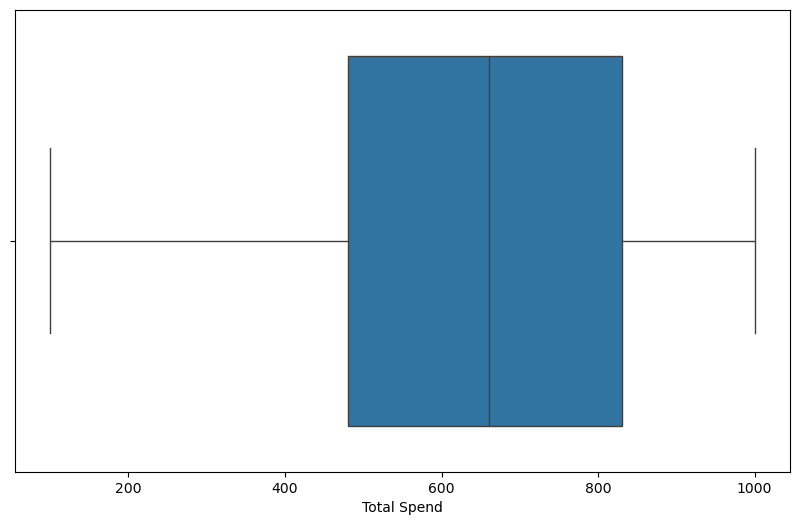

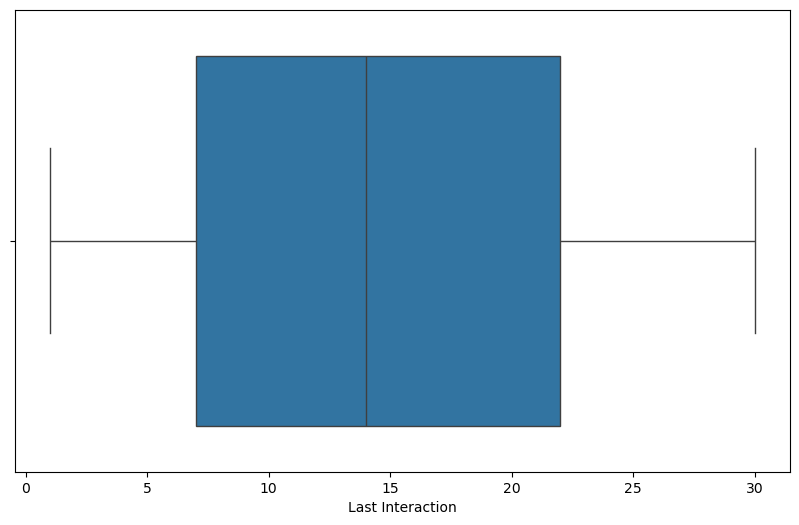

In [18]:
# outliers visualize

for col in num_col:
    if col!='Churn':
        plt.figure(figsize = (10, 6))
        sns.boxplot(x=df[col], data=df)
        plt.show()

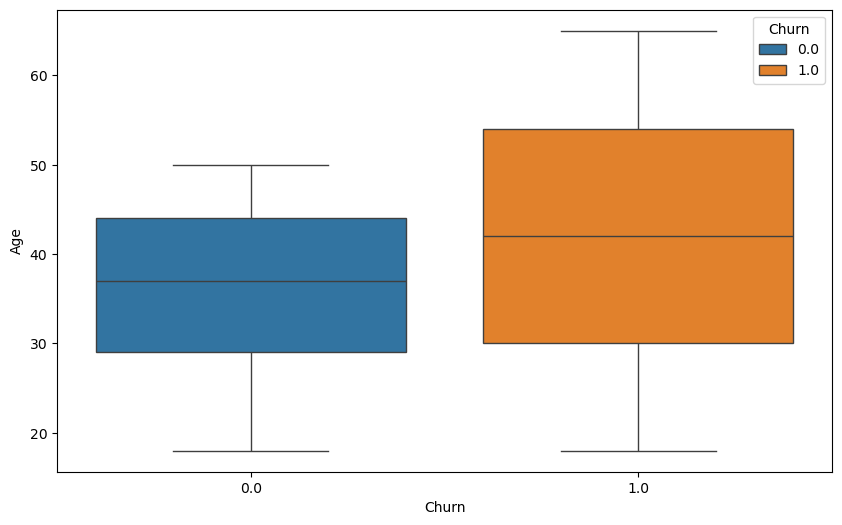

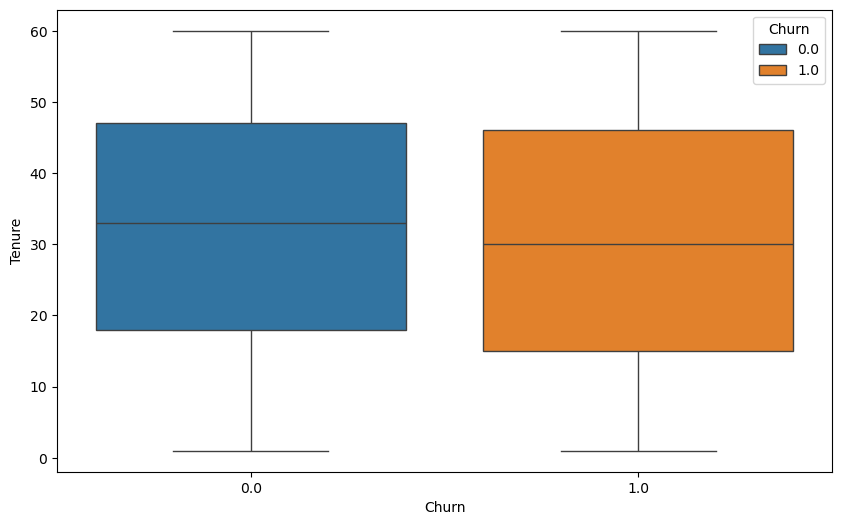

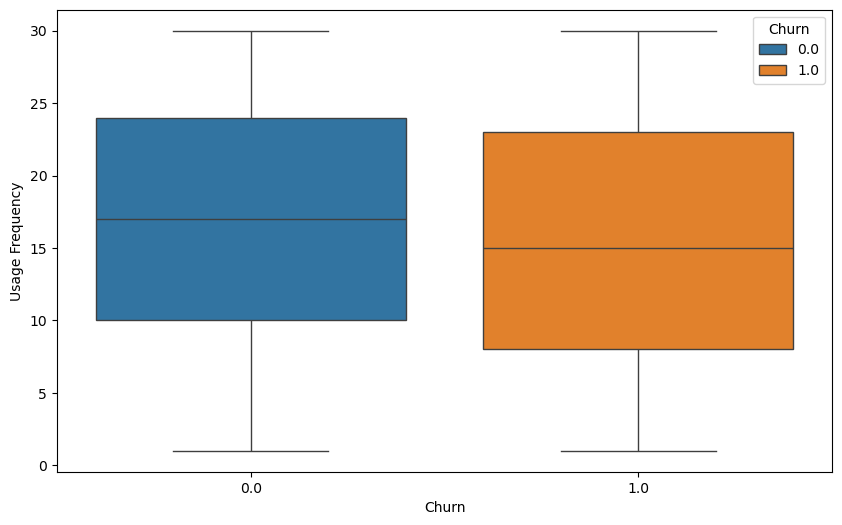

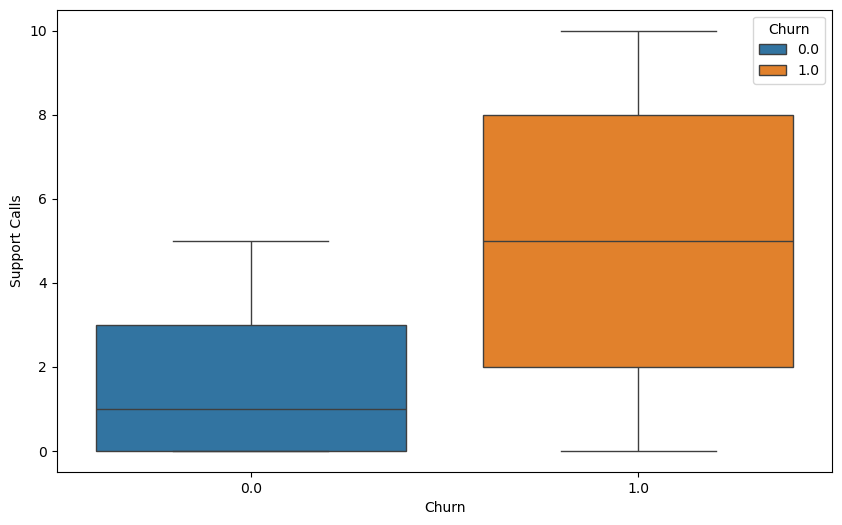

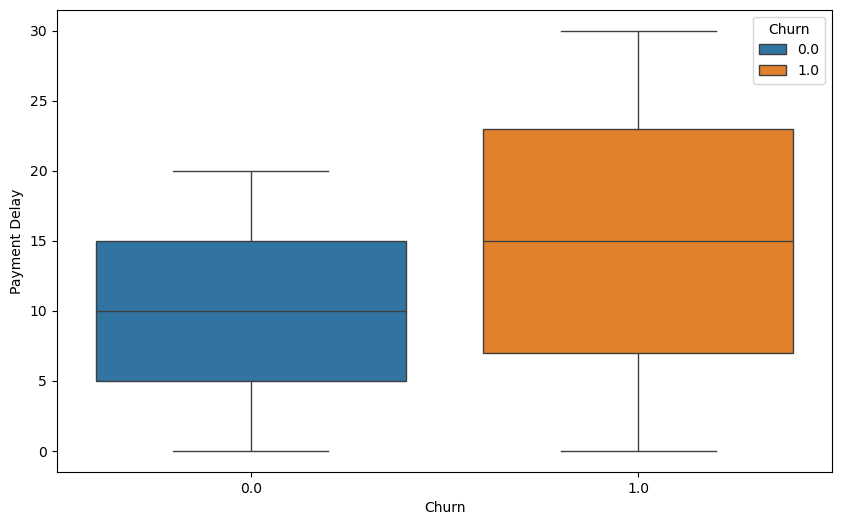

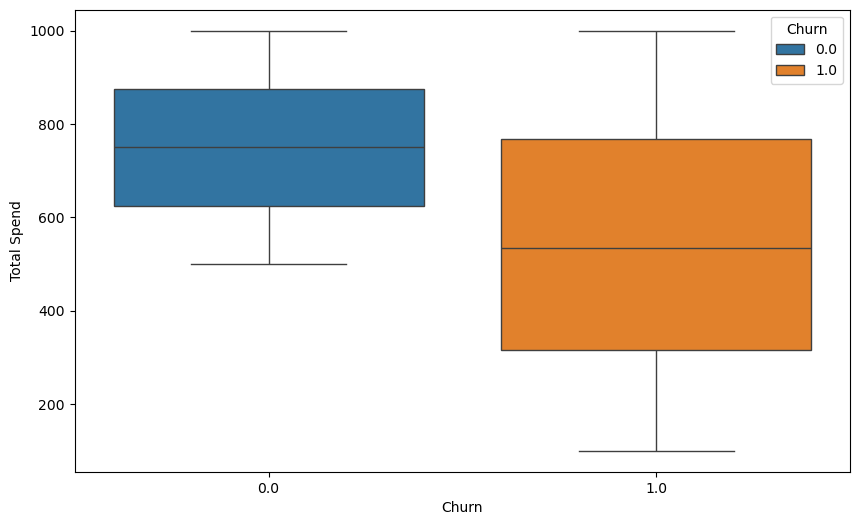

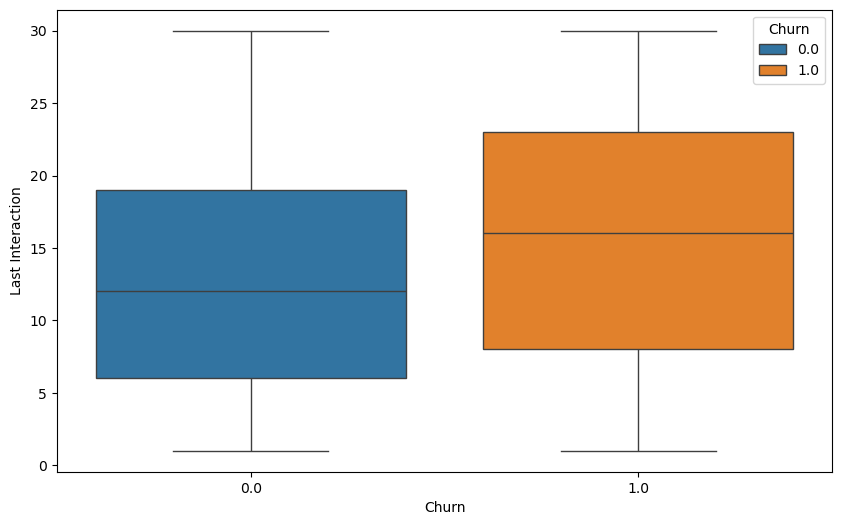

In [19]:
# outliers visualize

for col in num_col:
    if col!='Churn':
        plt.figure(figsize = (10, 6))
        sns.boxplot(x='Churn', y=df[col], data=df, hue='Churn')
        plt.show()

In [20]:
# corelation

df[num_col].corr()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
Age,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


<Axes: >

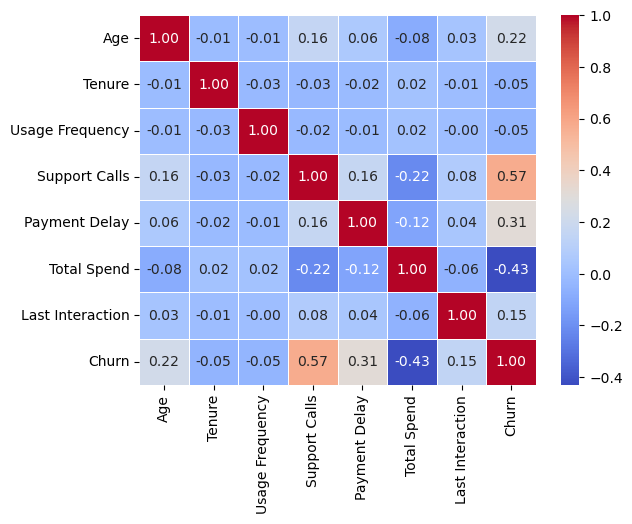

In [21]:
plt.Figure(figsize= (10, 10))
sns.heatmap(df[num_col].corr(), annot=True, linewidth=0.5, fmt='.2f', cmap = 'coolwarm')

In [22]:
# pairplot 
pair_df = ['Total Spend', 'Payment Delay', 'Support Calls', 'Age', 'Churn']
plt.Figure(figsize = (20, 16))
sns.pairplot(df[pair_df], palette = 'coolwarm', hue= 'Churn', diag_kind = 'kde')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001806280A200> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# train_test Split

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42,  stratify =y)


In [24]:
X_train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
318331,42.0,Male,46.0,30.0,3.0,4.0,Standard,Annual,945.08,8.0
429062,33.0,Female,43.0,17.0,1.0,15.0,Standard,Annual,987.79,12.0
60074,26.0,Female,13.0,30.0,4.0,12.0,Premium,Quarterly,800.00,5.0
12759,29.0,Female,9.0,23.0,10.0,24.0,Basic,Quarterly,119.00,19.0
357321,38.0,Male,10.0,20.0,0.0,0.0,Basic,Annual,678.97,18.0
...,...,...,...,...,...,...,...,...,...,...
154141,46.0,Female,2.0,9.0,5.0,26.0,Premium,Annual,747.00,8.0
39618,22.0,Female,7.0,5.0,6.0,1.0,Basic,Quarterly,833.00,5.0
395143,47.0,Male,43.0,14.0,1.0,7.0,Basic,Annual,754.05,9.0
116290,34.0,Female,2.0,9.0,3.0,30.0,Basic,Quarterly,167.00,28.0


In [25]:
y_train

318331    0.0
429062    0.0
60074     1.0
12759     1.0
357321    0.0
         ... 
154141    1.0
39618     1.0
395143    0.0
116290    1.0
70108     1.0
Name: Churn, Length: 352665, dtype: float64

In [26]:
# class imbalance
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)

from imblearn.under_sampling import RandomUnderSampler
sampler2 = RandomUnderSampler(random_state = 42)

In [27]:
# Outliers handling

from scipy.stats import zscore
import numpy as np

num_col1 =num_col.copy().drop('Churn') 
for col in num_col1:
    skew = X_train[col].skew()
    
    if abs(skew)>1:
        # IQR
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 3 * IQR
        upper = Q3 + 3 * IQR
        X_train[col] = X_train[col].where(
            ( X_train[col] >=lower) & (X_train[col] <=upper)
        )
    else:
        # Zscore
        z_score = zscore( X_train[col])
        X_train[col] = X_train[col].where(np.abs(z_score)<=3)
        

In [28]:
X_train.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
dtype: int64

In [29]:
for col in num_col1:
    skew = X_train[col].skew()
    if abs(skew) > 1:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 3 * IQR
        upper = Q3 + 3 * IQR
        outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    else:
        z_scores = zscore(X_train[col])
        outliers = X_train[np.abs(z_scores) > 3]

    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
Tenure: 0 outliers
Usage Frequency: 0 outliers
Support Calls: 0 outliers
Payment Delay: 0 outliers
Total Spend: 0 outliers
Last Interaction: 0 outliers


In [30]:
# Feature Engineering
contract_mapping = {'Monthly': 1, 'Quarterly': 2, 'Annual': 3}
subscription_mapping = {'Basic': 1, 'Standard': 2, 'Premium': 3}


X_train['Monthly Spend'] = X_train['Total Spend'] / X_train['Tenure'].replace(0, 1)
X_test['Monthly Spend'] = X_test['Total Spend'] / X_test['Tenure'].replace(0, 1)

X_train['Usage Intensity'] = X_train['Usage Frequency'] / X_train['Tenure'].replace(0, 1)
X_test['Usage Intensity'] = X_test['Usage Frequency'] / X_test['Tenure'].replace(0, 1)

X_train['Support Call Frequency'] = X_train['Support Calls'] / X_train['Tenure'].replace(0, 1)
X_test['Support Call Frequency'] = X_test['Support Calls'] / X_test['Tenure'].replace(0, 1)

X_train['Payment Reliability'] = 1 / (X_train['Payment Delay'] + 1)
X_test['Payment Reliability'] = 1 / (X_test['Payment Delay'] + 1)

X_train['Contract Length Numeric'] = X_train['Contract Length'].map(contract_mapping)
X_test['Contract Length Numeric'] = X_test['Contract Length'].map(contract_mapping)

X_train['Tenure Contract'] = X_train['Tenure'] * X_train['Contract Length Numeric']
X_test['Tenure Contract'] = X_test['Tenure'] * X_test['Contract Length Numeric']

X_train['Subscription Numeric'] = X_train['Subscription Type'].map(subscription_mapping)
X_test['Subscription Numeric'] = X_test['Subscription Type'].map(subscription_mapping)

X_train['Subscription Spend'] = X_train['Monthly Spend'] * X_train['Subscription Numeric']
X_test['Subscription Spend'] = X_test['Monthly Spend'] * X_test['Subscription Numeric']

X_train['Recency'] = X_train['Last Interaction'].max() - X_train['Last Interaction']
X_test['Recency'] = X_test['Last Interaction'].max() - X_test['Last Interaction']


X_train = X_train.drop(columns=['Contract Length', 'Subscription Type'])
X_test = X_test.drop(columns=['Contract Length', 'Subscription Type'])


In [31]:
X_train.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Monthly Spend',
       'Usage Intensity', 'Support Call Frequency', 'Payment Reliability',
       'Contract Length Numeric', 'Tenure Contract', 'Subscription Numeric',
       'Subscription Spend', 'Recency'],
      dtype='object')

In [32]:
X_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Monthly Spend,Usage Intensity,Support Call Frequency,Payment Reliability,Contract Length Numeric,Tenure Contract,Subscription Numeric,Subscription Spend,Recency
318331,42.0,Male,46.0,30.0,3.0,4.0,945.08,8.0,20.545217,0.652174,0.065217,0.200000,3,138.0,2,41.090435,22.0
429062,33.0,Female,43.0,17.0,1.0,15.0,987.79,12.0,22.971860,0.395349,0.023256,0.062500,3,129.0,2,45.943721,18.0
60074,26.0,Female,13.0,30.0,4.0,12.0,800.00,5.0,61.538462,2.307692,0.307692,0.076923,2,26.0,3,184.615385,25.0
12759,29.0,Female,9.0,23.0,10.0,24.0,119.00,19.0,13.222222,2.555556,1.111111,0.040000,2,18.0,1,13.222222,11.0
357321,38.0,Male,10.0,20.0,0.0,0.0,678.97,18.0,67.897000,2.000000,0.000000,1.000000,3,30.0,1,67.897000,12.0


In [33]:
X_train.dtypes

Age                        float64
Gender                      object
Tenure                     float64
Usage Frequency            float64
Support Calls              float64
Payment Delay              float64
Total Spend                float64
Last Interaction           float64
Monthly Spend              float64
Usage Intensity            float64
Support Call Frequency     float64
Payment Reliability        float64
Contract Length Numeric      int64
Tenure Contract            float64
Subscription Numeric         int64
Subscription Spend         float64
Recency                    float64
dtype: object

In [34]:
# preprocessing

num_cols = X_train.select_dtypes(include = 'number').columns
cat_cols = X_train.select_dtypes(include = 'object').columns

# num pipeline

from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown = 'ignore'))
])

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier


preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

model_pipe = Pipeline([
    ('preprocessor', preprocessor), 
    ('sampler', sampler2), 
    ('classifier', RandomForestClassifier(random_state=42))
])

model_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Monthly Spend', 'Usage Intensity',
       'Support Call Frequency', 'Payment Reliability',
       'Contract Len...e Contract', 'Subscription Numeric',
       'Subscription Spend', 'Recency'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender'], dtype='object'))])),
                ('sampler', RandomUnderSampler(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

Model Evaluation of model_pipe
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

Confusion Matrix 
 [[38164     3]
 [   20 49980]]
ROC-AUC Score 
 0.9999992603558048
Precision-Recall Curve 
Precision: [0.56710561 0.85932801 0.93836799 0.96812919 0.98137353 0.9877909
 0.99088387 0.99300922 0.99421368 0.99530217 0.99605562 0.99671085
 0.99740674 0.99776501 0.99820323 0.99848231 0.99878149 0.999001
 0.99912077 0.99930049 0.99940036 0.99954021 0.99966012 0.99970009
 0.99982003 0.99986002 0.99988001 0.99990001 0.99994    0.99994
 0.99994    0.99994    0.99994    0.99994    0.99993999 0.99993999
 0.99993999 0.99993999 0.99993999 0.99993998 0.99993998 0.99993998
 0.99993998 0.99993997 0.99993997 0.99993997 0.99993997 0.9

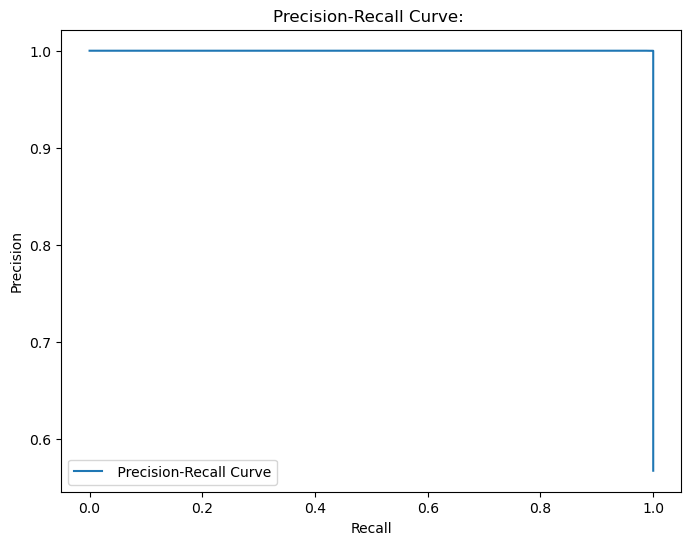

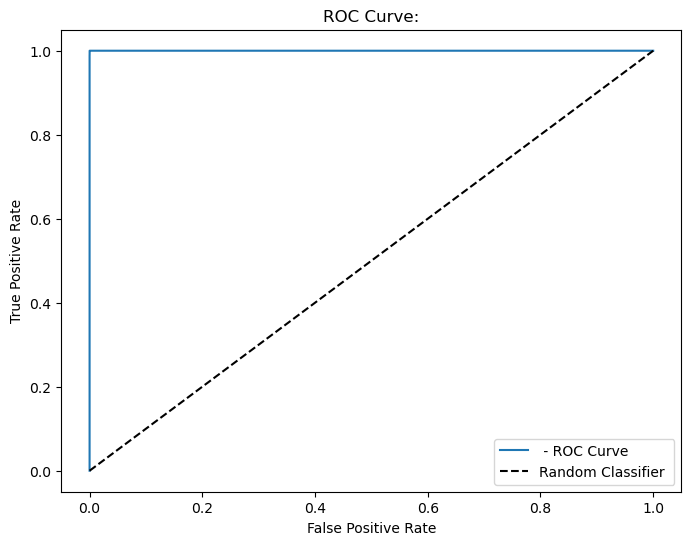

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
print(f"Model Evaluation of model_pipe") 
    
    # Make predictions
y_pred = model_pipe.predict(X_test)
    
    # Classification report
print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))

    # Get probabilities for ROC-AUC and Precision-Recall curve
y_prob = model_pipe.predict_proba(X_test)[:, 1]
    
    # ROC-AUC Score
print("ROC-AUC Score \n", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
print(f"Precision-Recall Curve ")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Thresholds: {thresholds}")
    
    # ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
print(f"False Positive Rate: {fpr}")
print(f"True Positive Rate: {tpr}")

    # Plotting Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=" Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve: ")
plt.legend()
plt.show()
    
    # Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f" - ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier ")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve:")
plt.legend()
plt.show()